In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set font to 12 and times new roman

plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "Times New Roman"

# set path to data

# Set seed
np.random.seed(42)

# Set working directory
os.chdir(r"..") # should be the git repo root directory
print("Current working directory: " + os.getcwd())
repo_name = 'net-load-forecasting'
assert os.getcwd()[-len(repo_name):] == "net-load-forecasting", "Working directory is not the git repo root directory"



Current working directory: c:\Users\nik\Desktop\Berkeley_Projects\net-load-forecasting


# Tables & Plots for the paper

#TODO: add the exact numbers for the tables and plots from the paper

### Plot 1: Training Ratio

In [57]:
df_metrics = pd.DataFrame()

for file in os.listdir(os.path.join(os.getcwd(),'data','model_results', 'meter')):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(os.getcwd(),'data','model_results',file))
        df_metrics = pd.concat([df_metrics,df], axis=0)


                



In [58]:
df_metrics

,model_setup,mae,mse,rmse,rmse_skill,imbalance_costs,METER_SCEN,train_ratio
0,prediction_additive,2.286825,15.101498,3.886065,0.392429,112.513152,1,0.3
1,prediction_integrated,3.598292,35.402134,5.949969,0.069746,176.350430,1,0.3
2,prediction_direct,3.387623,30.012427,5.478360,0.143480,162.613606,1,0.3
3,24h_persistance,3.537106,40.909703,6.396069,0.000000,168.121740,1,0.3
4,prediction_additive,2.290356,15.201928,3.898965,0.390412,112.099150,1,0.4
...,...,...,...,...,...,...,...,...
27,24h_persistance,3.537106,40.909703,6.396069,0.000000,168.121740,2,0.5
28,prediction_additive,2.337421,14.852324,3.853871,0.397463,107.332032,2,0.8
29,prediction_integrated,4.731679,53.669055,7.325917,-0.145378,232.874550,2,0.8
30,prediction_direct,3.956632,37.658277,6.136634,0.040562,190.707720,2,0.8


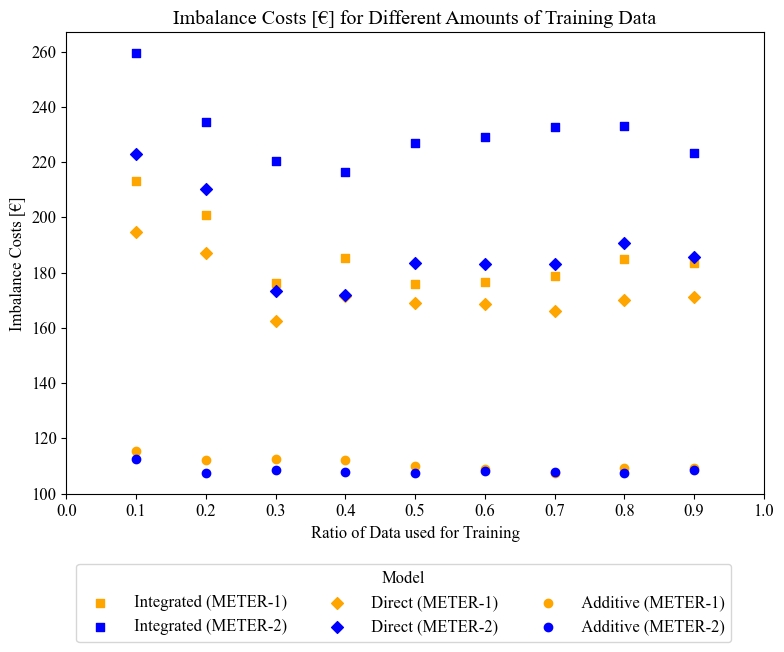

In [61]:
# Sort the DataFrame by model and season

metric_of_interest = 'imbalance_costs'

metrics_dict = {'mae': 'Mean Absolute Error (MAE)',
                'mse': 'Mean Squared Error (MSE)',
                'rmse': 'Root Mean Squared Error (RMSE)',
                'rmse_skill': 'RMSE Skill Score',
                'mape': 'Mean Absolute Percentage Error (MAPE)',
                'imbalance_costs': 'Imbalance Costs [€]',
                }


df = df_metrics[['model_setup', metric_of_interest, 'METER_SCEN', 'train_ratio']].sort_values(by=['model_setup', 'METER_SCEN'])

# Define colors and shapes based on the season and model
meter2color = {1: 'orange', 2: 'blue'}
color2meter = {v: k for k, v in meter2color.items()}
model2shape = {
    'prediction_additive': 'o',
    'prediction_integrated': 's',
    'prediction_direct': 'D',
}
shape2model = {v: k for k, v in model2shape.items()}

# Map the colors and shapes to the DataFrame
df['color'] = df['METER_SCEN'].map(meter2color)
df['shape'] = df['model_setup'].map(model2shape)

# Create the scatter plot
fig, ax = plt.subplots()

legend_labels = []
for shape in set(df['shape']):
    for color in set(df.loc[df['shape'] == shape, 'color']):
        x = df.loc[(df['shape'] == shape) & (df['color'] == color), 'train_ratio']
        y = df.loc[(df['shape'] == shape) & (df['color'] == color), metric_of_interest]
        
        model_name = shape2model[shape].title()
        if model_name != '24h_persistence':
            model_name = model_name.replace('Prediction_', ' ')
        label = f'{model_name} (METER-{color2meter[color]})'
        ax.scatter(x, y, c=color, marker=shape, label=label)
        if shape not in legend_labels:
            legend_labels.append(label)

if metric_of_interest == 'rmse_skill':
    ax.axhline(y=0, color='red', linestyle='--')


# Set the x ticks and labels
ax.set_xticks(np.arange(0.0, 1.1, 0.1))
ax.set_xlabel('Ratio of Data used for Training')

# Set the y label
ax.set_ylabel(f'{metrics_dict[metric_of_interest]}')

# Set the title
ax.set_title(f'{metrics_dict[metric_of_interest]} for Different Amounts of Training Data')

# Set the legend
legend = fig.legend(handles=ax.collections, labels=legend_labels, title='Model',loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Adjust the figure size
fig.set_size_inches(9, 6)

# Show the plot
plt.show()


In [62]:
for format in ['png', 'pdf']:
    fig.savefig(os.path.join(os.getcwd(),'imgs','figures',f'train_ratio_{metric_of_interest}.{format}'), bbox_inches='tight')



### Plot 2: Impact of META-SCEN on RMSE Skill

In [4]:
df_metrics = pd.DataFrame()

for file in os.listdir(os.path.join(os.getcwd(),'data','model_results', 'meta')):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(os.getcwd(),'data','model_results', 'meta',file))
        df_metrics = pd.concat([df_metrics,df], axis=0)


                



In [14]:
df_metrics

,model_setup,mae,mse,rmse,rmse_skill,imbalance_costs,META_SCEN
0,prediction_additive,2.242448,14.520858,3.810624,0.404224,109.336193,1
1,prediction_integrated,3.762551,35.582234,5.965085,0.067383,183.541550,1
2,prediction_direct,3.579237,31.276290,5.592521,0.125632,171.328927,1
3,24h_persistance,3.537106,40.909703,6.396069,0.000000,168.121740,1
4,prediction_additive,2.193943,13.842681,3.720575,0.418303,107.172883,2
5,prediction_integrated,3.749487,35.260130,5.938024,0.071614,182.517129,2
6,prediction_direct,3.579237,31.276290,5.592521,0.125632,171.328927,2
7,24h_persistance,3.537106,40.909703,6.396069,0.000000,168.121740,2
8,prediction_additive,2.246949,14.532645,3.812171,0.403982,109.357481,3
9,prediction_integrated,3.776347,35.660870,5.971672,0.066353,182.599657,3


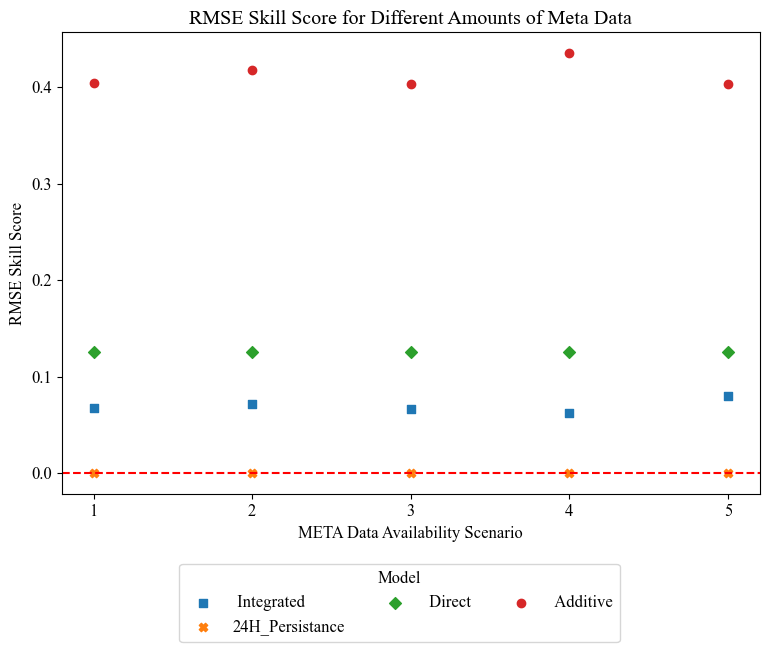

In [19]:
# Sort the DataFrame by model and season

metric_of_interest = 'rmse_skill'

metrics_dict = {'mae': 'Mean Absolute Error (MAE)',
                'mse': 'Mean Squared Error (MSE)',
                'rmse': 'Root Mean Squared Error (RMSE)',
                'rmse_skill': 'RMSE Skill Score',
                'mape': 'Mean Absolute Percentage Error (MAPE)',
                'imbalance_costs': 'Imbalance Costs [€]',
                }


df = df_metrics[['model_setup', metric_of_interest, 'META_SCEN']].sort_values(by=['model_setup', 'META_SCEN'])

model2shape = {
    'prediction_additive': 'o',
    'prediction_integrated': 's',
    'prediction_direct': 'D',
    '24h_persistance': 'X'
}
shape2model = {v: k for k, v in model2shape.items()}

# Map the colors and shapes to the DataFrame
df['shape'] = df['model_setup'].map(model2shape)

# Create the scatter plot
fig, ax = plt.subplots()

legend_labels = []
for shape in set(df['shape']):
    x = df.loc[(df['shape'] == shape) , 'META_SCEN']
    y = df.loc[(df['shape'] == shape) , metric_of_interest]
    
    model_name = shape2model[shape].title()
    if model_name != '24h_persistence':
        model_name = model_name.replace('Prediction_', ' ')
    label = f'{model_name}'
    ax.scatter(x, y, marker=shape, label=label)
    if shape not in legend_labels:
        legend_labels.append(label)

if metric_of_interest == 'rmse_skill':
    ax.axhline(y=0, color='red', linestyle='--')


# Set the x ticks and labels
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('META Data Availability Scenario')

# Set the y label
ax.set_ylabel(f'{metrics_dict[metric_of_interest]}')

# Set the title
ax.set_title(f'{metrics_dict[metric_of_interest]} for Different Amounts of Meta Data')

# Set the legend
legend = fig.legend(handles=ax.collections, labels=legend_labels, title='Model',loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Adjust the figure size
fig.set_size_inches(9, 6)

# Show the plot
plt.show()


### Plot 3: Side-by-side line plots of the different models